# Question 4

An article in Quality and Reliability Engineering Internation presents a $2^5$ factorial design. The experiment is shown in the following table: 

In [9]:
A <- rep(c(-1, 1), 16)
B <- rep(c(-1, -1, 1, 1), 8)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 4)
D <- rep(c(-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1), 2)
E <- c(
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
)
y <- c(
    08.11, 05.56, 05.77, 05.82, 09.17, 07.80, 03.23, 05.69,
    08.82, 14.23, 09.20, 08.94, 08.68, 11.49, 06.25, 09.12,
    07.93, 05.00, 07.47, 12.00, 09.86, 03.65, 06.40, 11.61,
    12.43, 17.55, 08.87, 25.38, 13.06, 18.85, 11.78, 26.05
)
data <- data.frame(A, B, C, D, E, y)
t(data)

A,-1.00,1.00,-1.00,1.00,-1.00,1.0,-1.00,1.00,-1.00,1.00,...,-1.0,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00
B,-1.00,-1.00,1.00,1.00,-1.00,-1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,1.00,1.00,-1.00,-1.00,1.00,1.00
C,-1.00,-1.00,-1.00,-1.00,1.00,1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,1.00
D,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,1.00,1.00,...,-1.0,-1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
E,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,-1.00,-1.00,...,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
y,8.11,5.56,5.77,5.82,9.17,7.8,3.23,5.69,8.82,14.23,...,6.4,11.61,12.43,17.55,8.87,25.38,13.06,18.85,11.78,26.05


**a)** Analyze the data from this experiment. Identify the significant factors and interactions and removing the non-significant terms, when appropriate.

Call:
   aov(formula = y ~ A * B * C * D * E, data = data)

Terms:
                        A         B         C         D         E       A:B
Sum of Squares   83.56013   0.06038   0.00475 285.78428 153.16875  48.93078
Deg. of Freedom         1         1         1         1         1         1
                      A:C       B:C       A:D       B:D       C:D       A:E
Sum of Squares    0.00008   1.22070  88.87778   0.00578   0.00038  33.76365
Deg. of Freedom         1         1         1         1         1         1
                      B:E       C:E       D:E     A:B:C     A:B:D     A:C:D
Sum of Squares   52.71078   2.91008  61.79940   2.00500   3.81570   0.12878
Deg. of Freedom         1         1         1         1         1         1
                    B:C:D     A:B:E     A:C:E     B:C:E     A:D:E     B:D:E
Sum of Squares    2.98290  44.95890   2.14763   0.93503  26.01008   0.05040
Deg. of Freedom         1         1         1         1         1         1
                    C

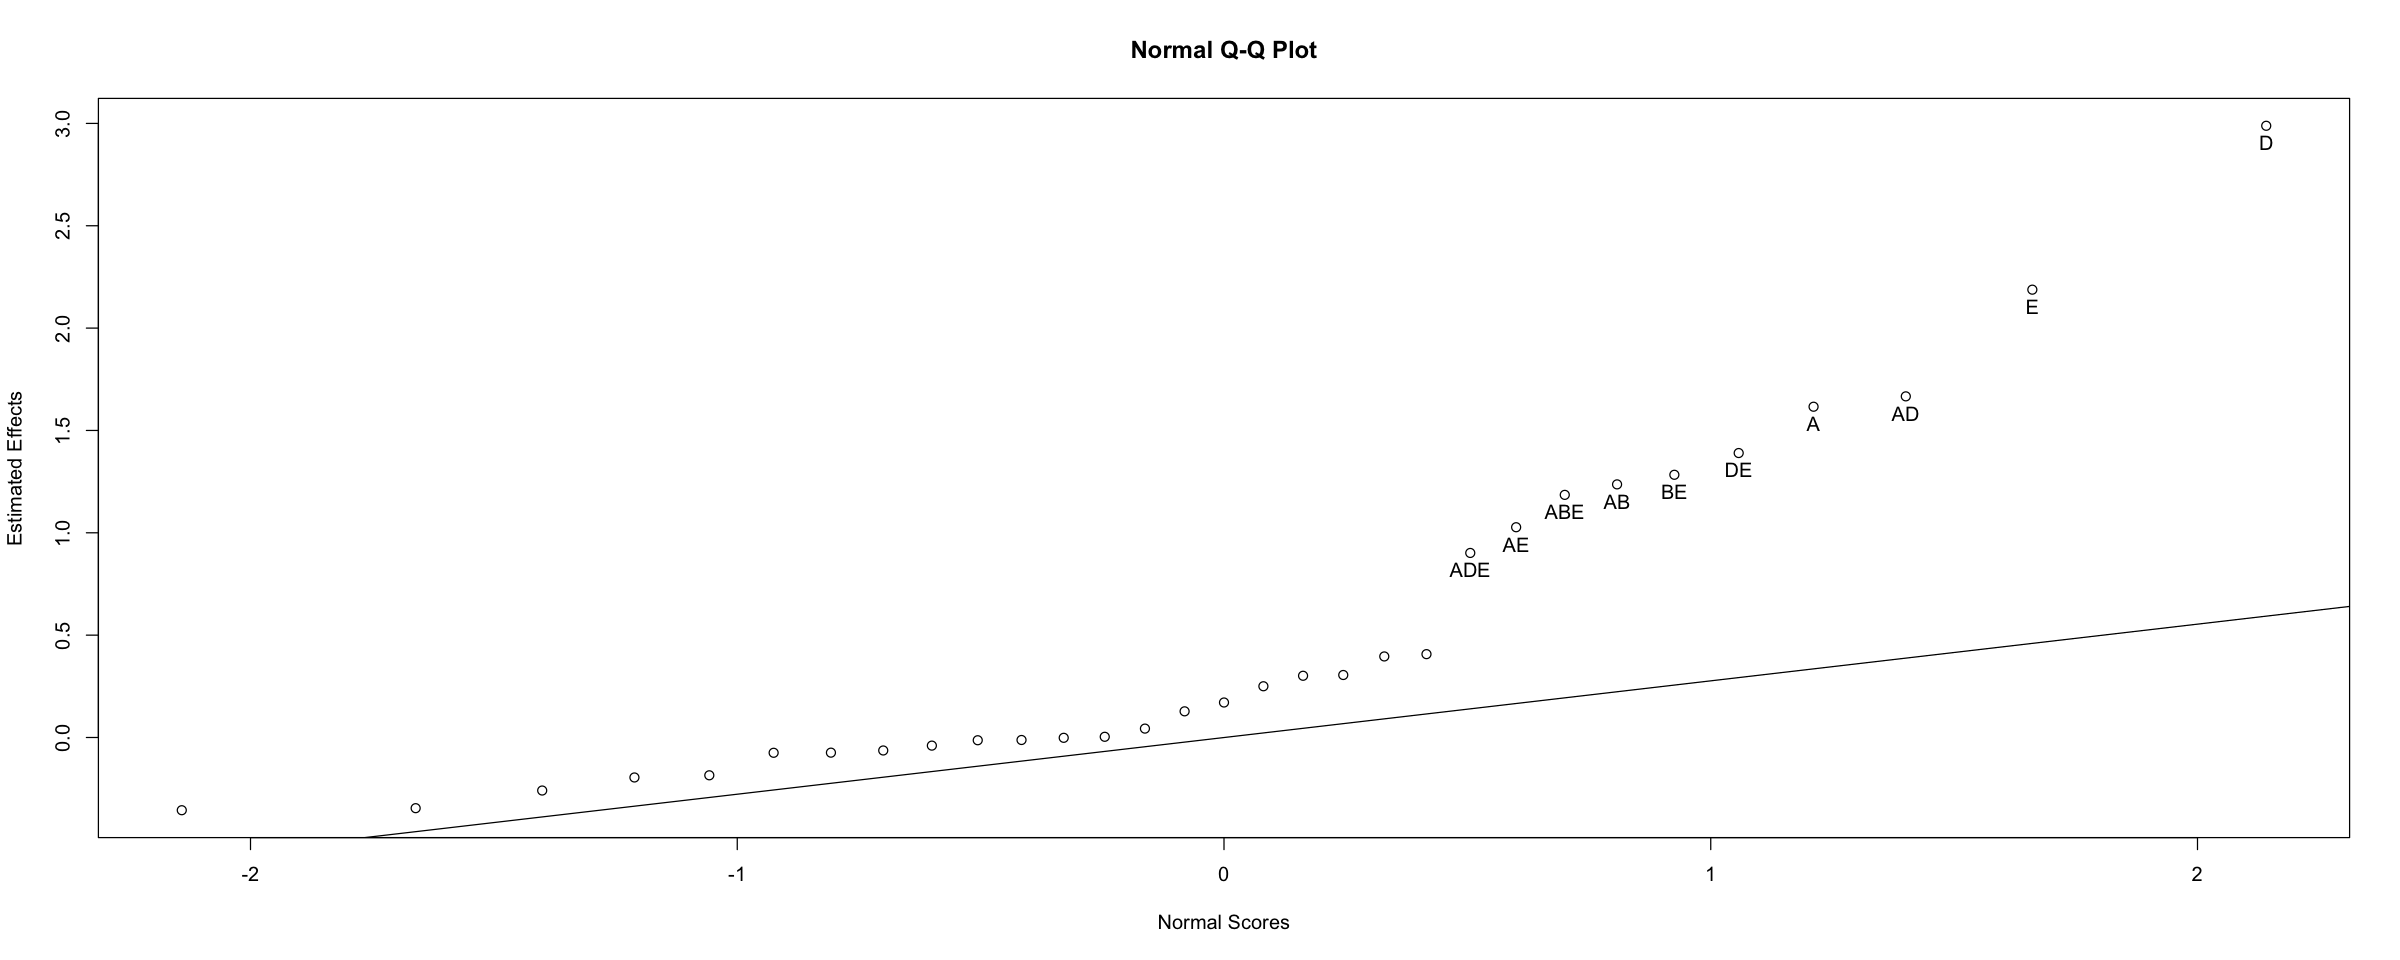

In [10]:
model <- lm(y ~ A*B*C*D*E, data = data)
library(daewr)
aov(y ~ A*B*C*D*E, data = data)
fullnormal(coef(model)[-1], alpha = 0.025)

$C$ is not significant and is not part of any significant interactions. $B$ is not significant but it has significant interactinos, so we will keep it in.

In [11]:
aov1 <- aov(y~ A*B*D*E, data = data)
summary(aov1)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  83.56   83.56  57.233 1.14e-06 ***
B            1   0.06    0.06   0.041 0.841418    
D            1 285.78  285.78 195.742 2.16e-10 ***
E            1 153.17  153.17 104.910 1.97e-08 ***
A:B          1  48.93   48.93  33.514 2.77e-05 ***
A:D          1  88.88   88.88  60.875 7.66e-07 ***
B:D          1   0.01    0.01   0.004 0.950618    
A:E          1  33.76   33.76  23.126 0.000193 ***
B:E          1  52.71   52.71  36.103 1.82e-05 ***
D:E          1  61.80   61.80  42.328 7.24e-06 ***
A:B:D        1   3.82    3.82   2.613 0.125501    
A:B:E        1  44.96   44.96  30.794 4.40e-05 ***
A:D:E        1  26.01   26.01  17.815 0.000650 ***
B:D:E        1   0.05    0.05   0.035 0.854935    
A:B:D:E      1   5.31    5.31   3.634 0.074735 .  
Residuals   16  23.36    1.46                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Now, create a new model by removing the insignificant interactions. 

In [12]:
aov2 <- aov(y ~ A*B*D*E - B -  B:D - A:B:D - B:D:E - A:B:D:E, data = data)
summary(aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  83.56   83.56   53.83 3.20e-07 ***
D            1 285.78  285.78  184.11 7.32e-12 ***
E            1 153.17  153.17   98.67 2.18e-09 ***
A:B          1  48.93   48.93   31.52 1.43e-05 ***
A:D          1  88.88   88.88   57.26 1.99e-07 ***
A:E          1  33.76   33.76   21.75 0.000133 ***
B:E          1  52.71   52.71   33.96 8.75e-06 ***
D:E          1  61.80   61.80   39.81 2.95e-06 ***
A:B:E        1  44.96   44.96   28.96 2.45e-05 ***
A:D:E        1  26.01   26.01   16.76 0.000520 ***
Residuals   21  32.60    1.55                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**b)** One of the factors from this experiment does not seem to be important. If you drop this factor, what type of design remains? Analyze the data using the full factorial model for only the four active factors, including model adequacy checking.

$C$ is not important to the design, if we drop this factor we can project the original design into a $2^4$ full factorial design with $2$ replicates. We can analyze the data like so:

In [13]:
projection <- subset(data, select = -c(C))
model2 <- lm(y ~ A*B*D*E, data = projection)
model2.aov <- aov(model2)
summary(model2)
summary(model2.aov)


Call:
lm(formula = y ~ A * B * D * E, data = projection)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4750 -0.5637  0.0000  0.5637  1.4750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.18031    0.21360  47.661  < 2e-16 ***
A            1.61594    0.21360   7.565 1.14e-06 ***
B            0.04344    0.21360   0.203 0.841418    
D            2.98844    0.21360  13.991 2.16e-10 ***
E            2.18781    0.21360  10.243 1.97e-08 ***
A:B          1.23656    0.21360   5.789 2.77e-05 ***
A:D          1.66656    0.21360   7.802 7.66e-07 ***
B:D         -0.01344    0.21360  -0.063 0.950618    
A:E          1.02719    0.21360   4.809 0.000193 ***
B:E          1.28344    0.21360   6.009 1.82e-05 ***
D:E          1.38969    0.21360   6.506 7.24e-06 ***
A:B:D       -0.34531    0.21360  -1.617 0.125501    
A:B:E        1.18531    0.21360   5.549 4.40e-05 ***
A:D:E        0.90156    0.21360   4.221 0.000650 ***
B:D:E       -0.03969    0.21360  -0.18

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  83.56   83.56  57.233 1.14e-06 ***
B            1   0.06    0.06   0.041 0.841418    
D            1 285.78  285.78 195.742 2.16e-10 ***
E            1 153.17  153.17 104.910 1.97e-08 ***
A:B          1  48.93   48.93  33.514 2.77e-05 ***
A:D          1  88.88   88.88  60.875 7.66e-07 ***
B:D          1   0.01    0.01   0.004 0.950618    
A:E          1  33.76   33.76  23.126 0.000193 ***
B:E          1  52.71   52.71  36.103 1.82e-05 ***
D:E          1  61.80   61.80  42.328 7.24e-06 ***
A:B:D        1   3.82    3.82   2.613 0.125501    
A:B:E        1  44.96   44.96  30.794 4.40e-05 ***
A:D:E        1  26.01   26.01  17.815 0.000650 ***
B:D:E        1   0.05    0.05   0.035 0.854935    
A:B:D:E      1   5.31    5.31   3.634 0.074735 .  
Residuals   16  23.36    1.46                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The output is essentially the same as in part a). We can check model adequacy with the following graphs.


	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.96505, p-value = 0.3751


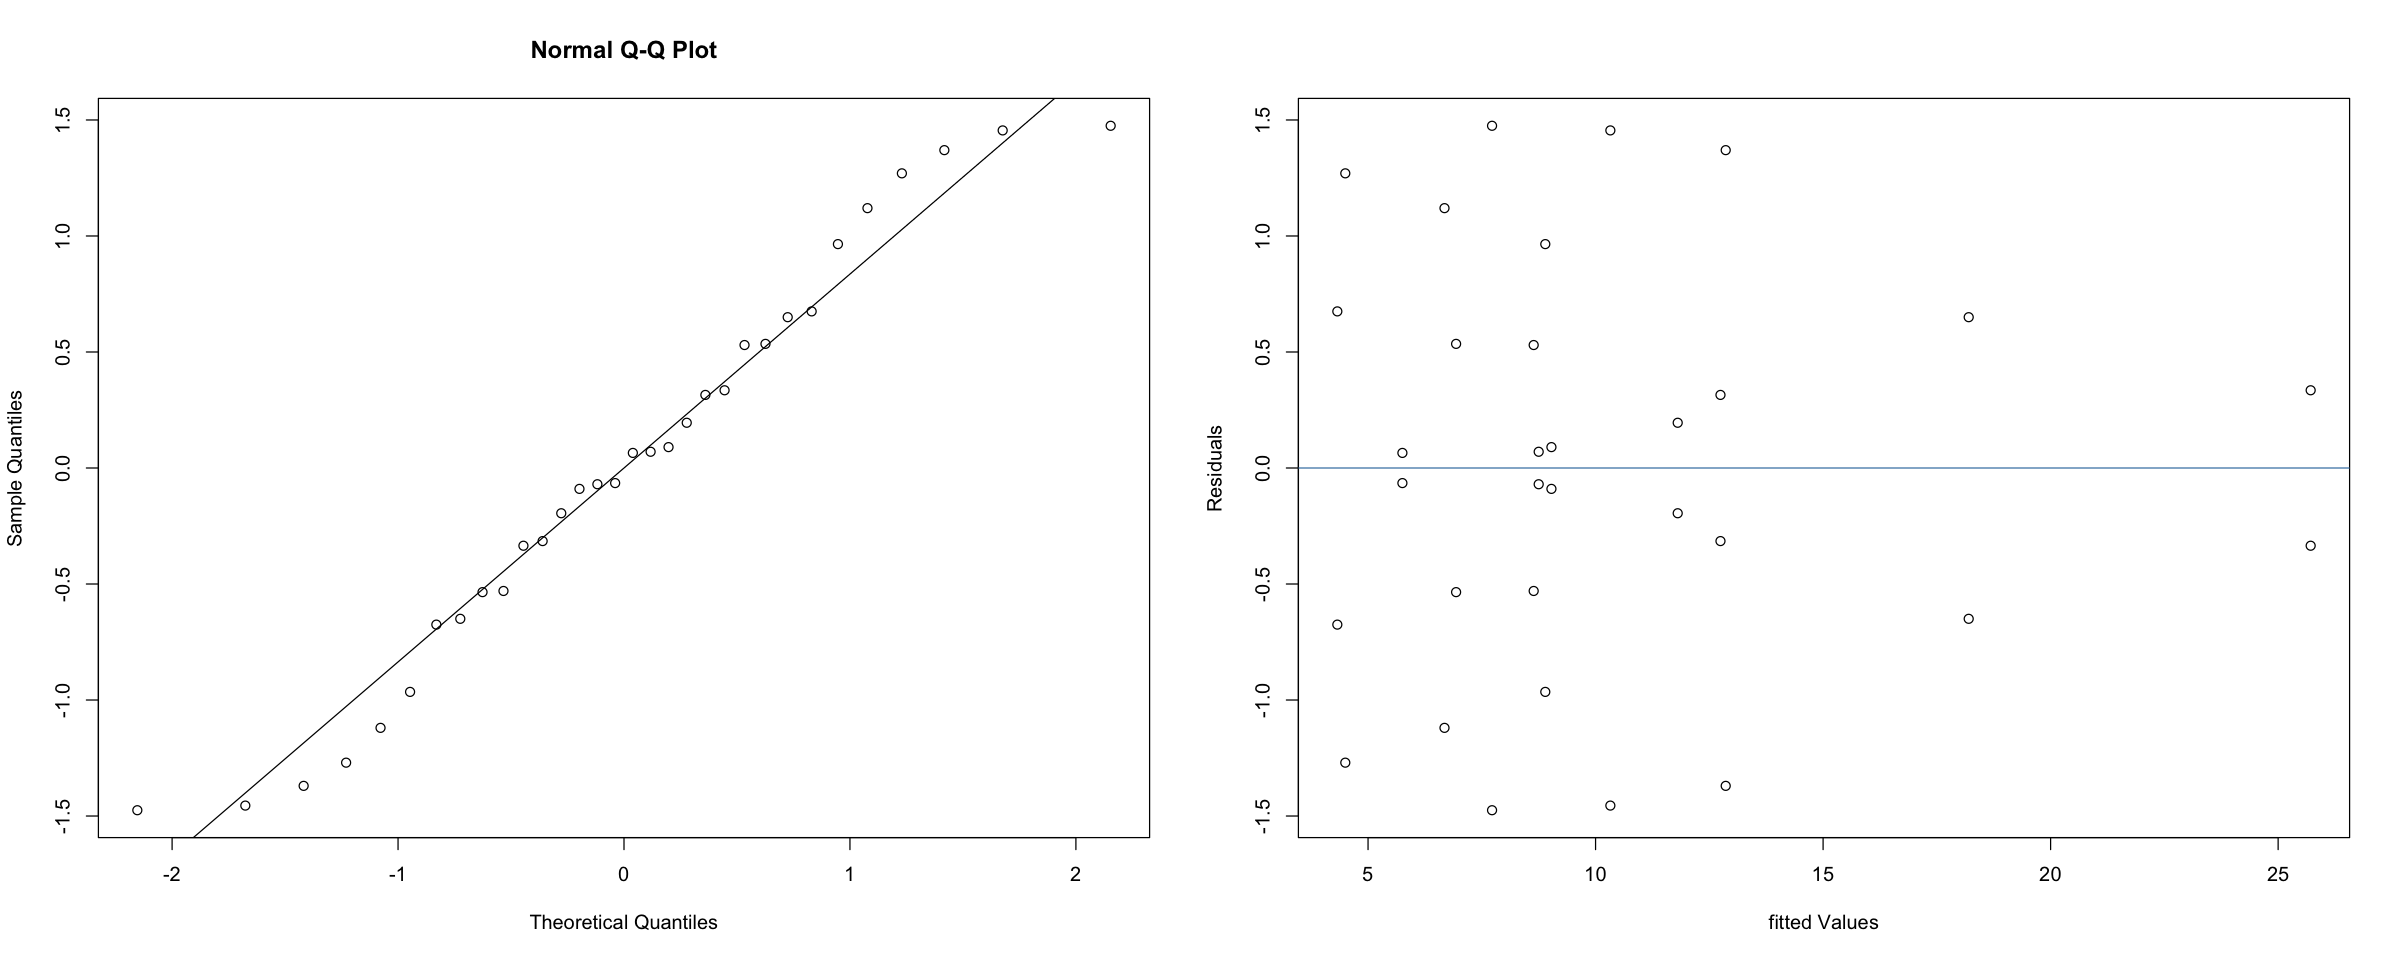

In [14]:
par(mfrow = c(1,2))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQplot
qqnorm(residuals(model2))
qqline(residuals(model2))
# Fitted Values versus Residuals
plot(fitted(model2), residuals(model2), xlab = "fitted Values", ylab = "Residuals")
abline(h=0, col= "steelblue")  
# Shapiro-Wilk
shapiro.test(residuals(model2))

The graphs don't suggest that normality or constant variance assumptions are violated. 

**c)** Find the settings of the active factors that maximize the predicted response.

We maximize the response by looking at the regression coefficients and selecting the model combination that produces the highest reponse output.

In [15]:
# predict the reponse for all combinations of factors.
factors <- expand.grid(A = c(-1, 1), B = c(-1, 1), D = c(-1, 1), E = c(-1, 1))
predictions <- predict(model2, newdata = factors)
factors$response <- predictions
t(factors)
# Output the combination with the highest repose.
optimal_combination <- factors[which.max(factors$response), ]
optimal_combination

A,-1.00,1.00,-1.0,1.000,-1.00,1.00,-1.000,1.00,-1.000,1.000,-1.000,1.000,-1.000,1.0,-1.000,1.000
B,-1.00,-1.00,1.0,1.000,-1.00,-1.00,1.000,1.00,-1.000,-1.000,1.000,1.000,-1.000,-1.0,1.000,1.000
D,-1.00,-1.00,-1.0,-1.000,1.00,1.00,1.000,1.00,-1.000,-1.000,-1.000,-1.000,1.000,1.0,1.000,1.000
E,-1.00,-1.00,-1.0,-1.000,-1.00,-1.00,-1.000,-1.00,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000
response,8.64,6.68,4.5,5.755,8.75,12.86,7.725,9.03,8.895,4.325,6.935,11.805,12.745,18.2,10.325,25.715


,A,B,D,E,response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,1,1,1,1,25.715


Settings all 4 active factors to high will maximize the predicted response.